In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Example data
y_true = torch.tensor([1., 0., 1., 0.])
y_pred = torch.tensor([0.9, 0.2, 0.8, 0.3])

# 1. Mean Squared Error (MSE) Loss
mse_loss = nn.MSELoss()
mse_loss_value = mse_loss(y_pred, y_true)
print("MSE Loss:", mse_loss_value.item())
# Intuition: Measures the average squared difference between predicted and true values.
# Math: MSE = 1/N * sum((y_true - y_pred)^2)

# 2. Binary Cross Entropy Loss
bce_loss = nn.BCELoss()
bce_loss_value = bce_loss(y_pred, y_true.float())
print("Binary Cross Entropy Loss:", bce_loss_value.item())
# Intuition: Measures the average binary cross-entropy between predicted and true values.
# Math: BCE = -1/N * sum(y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred))

# 3. Categorical Cross Entropy Loss
y_true_categorical = torch.tensor([2, 0, 1])
y_pred_categorical = torch.tensor([[0.1, 0.2, 0.7],
                                   [0.8, 0.1, 0.1],
                                   [0.3, 0.4, 0.3]])
ce_loss = nn.CrossEntropyLoss()
ce_loss_value = ce_loss(y_pred_categorical, y_true_categorical)
print("Categorical Cross Entropy Loss:", ce_loss_value.item())
# Intuition: Measures the average cross-entropy loss between predicted and true class probabilities.
# Math: CE = -1/N * sum(log(y_pred[i][y_true[i]]))

# 4. Kullback-Leibler Divergence Loss
kl_loss = nn.KLDivLoss(reduction='batchmean')
kl_loss_value = kl_loss(torch.log(y_pred), y_true)
print("Kullback-Leibler Divergence Loss:", kl_loss_value.item())
# Intuition: Measures the average Kullback-Leibler divergence between predicted and true distributions.
# Math: KL = 1/N * sum(y_true * log(y_true / y_pred))




MSE Loss: 0.04500000178813934
Binary Cross Entropy Loss: 0.22708065807819366
Categorical Cross Entropy Loss: 0.8302483558654785
Kullback-Leibler Divergence Loss: 0.08212602138519287


KL Divergence
In the example below, we have a fixed true distribution P and a sequence of approximated distributions Q. Each Q in the sequence represents a progressively diverging distribution from P. We calculate the KL divergence for each Q and store the values in the KL_values list.

The code then plots the KL divergence values over iterations. Each point on the plot represents the KL divergence between the corresponding Q and the true distribution P. As the iterations progress, the approximated distributions diverge further from the true distribution, resulting in larger KL divergence values.

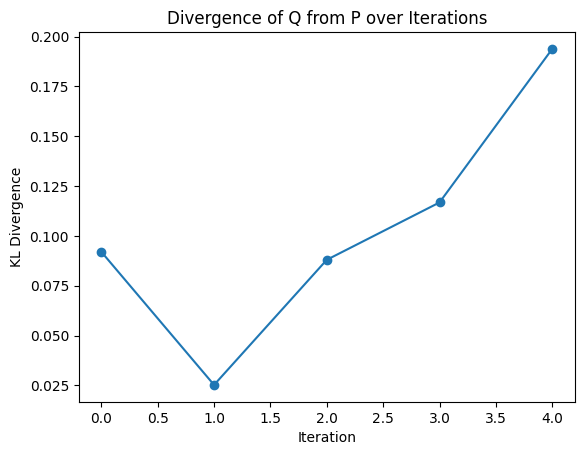

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true distribution P
P = np.array([0.2, 0.3, 0.5])

# Define a sequence of approximated distributions Q
Q_sequence = [
    np.array([0.1, 0.2, 0.7]),
    np.array([0.2, 0.4, 0.4]),
    np.array([0.3, 0.4, 0.3]),
    np.array([0.4, 0.3, 0.3]),
    np.array([0.5, 0.2, 0.3])
]

# Calculate the KL divergence for each Q in the sequence
KL_values = []
for Q in Q_sequence:
    KL = np.sum(P * np.log(P / Q))
    KL_values.append(KL)

# Plot the KL divergence values
iterations = np.arange(len(Q_sequence))
plt.plot(iterations, KL_values, marker='o')

# Add labels and title to the plot
plt.xlabel('Iteration')
plt.ylabel('KL Divergence')
plt.title('Divergence of Q from P over Iterations')

# Display the plot
plt.show()


# NLL



In [9]:
import numpy as np

# True probability of getting heads
true_prob = 0.6

# Observed data (coin flips)
data = ['H', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'T']

# Calculate the negative log-likelihood
nll = -np.sum(np.log([true_prob if flip == 'H' else 1 - true_prob for flip in data]))

# Print the result
print(f"Negative Log-Likelihood: {nll}")


Negative Log-Likelihood: 7.541046886308893


In the example below, we have a tensor of true class labels (true_labels) and a tensor of predicted class probabilities (pred_probs). The predicted probabilities are represented as a 2D tensor, where each row corresponds to the predicted probabilities for a specific instance, and each column represents the probabilities for a particular class.

We use the nn.NLLLoss function to compute the NLL loss. Since the NLLLoss expects log-probabilities as input, we pass torch.log(pred_probs) to convert the predicted probabilities to log-probabilities. We then compute the NLL loss by comparing the predicted log-probabilities with the true class labels.

The resulting NLL loss represents the discrepancy between the predicted class probabilities and the true class labels. A lower NLL loss indicates a better fit between the model's predictions and the true labels.








In [10]:
import torch
import torch.nn as nn

# True class labels
true_labels = torch.tensor([2, 1, 0, 3])

# Predicted class probabilities
pred_probs = torch.tensor([[0.1, 0.2, 0.6, 0.1],
                           [0.3, 0.4, 0.1, 0.2],
                           [0.7, 0.1, 0.1, 0.1],
                           [0.2, 0.2, 0.2, 0.4]])

# Define the negative log-likelihood (NLL) loss function
loss_fn = nn.NLLLoss()

# Compute the NLL loss
nll_loss = loss_fn(torch.log(pred_probs), true_labels)

# Print the NLL loss
print("Negative Log-Likelihood (NLL) Loss:", nll_loss.item())


Negative Log-Likelihood (NLL) Loss: 0.6750205159187317
